In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

plt.style.use('bmh')

In [2]:
data=pd.read_csv('E:/Dsc_analytixlabs/New_ML/Capstone Projects/13. Capstone Case Study - Demand Estimation/Electricity Consumption.csv')

In [3]:
data.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [5]:
dates = pd.date_range(start='01-01-1973', freq='MS', periods=len(data))

In [6]:
dates

DatetimeIndex(['1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',
               '1973-09-01', '1973-10-01',
               ...
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01'],
              dtype='datetime64[ns]', length=561, freq='MS')

In [7]:
import calendar
data['Month'] = dates.month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data['Year'] = dates.year

In [8]:
data.head()

,DATE,Electricty_Consumption_in_TW,Month,Year
0,1/1/1973,35.9728,Jan,1973
1,2/1/1973,36.1334,Feb,1973
2,3/1/1973,35.0625,Mar,1973
3,4/1/1973,33.8416,Apr,1973
4,5/1/1973,33.5107,May,1973


In [9]:
data.DATE.duplicated().sum()

0

In [10]:
data.drop(['DATE'], axis=1, inplace=True)
data = data[['Electricty_Consumption_in_TW','Month', 'Year']]

In [11]:
data.head()

,Electricty_Consumption_in_TW,Month,Year
0,35.9728,Jan,1973
1,36.1334,Feb,1973
2,35.0625,Mar,1973
3,33.8416,Apr,1973
4,33.5107,May,1973


In [12]:
# set the dates as the index of the dataframe, so that it can be treated as a time-series dataframe
data.set_index(dates, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Freq: MS
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Electricty_Consumption_in_TW  561 non-null    float64
 1   Month                         561 non-null    object 
 2   Year                          561 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 17.5+ KB


In [14]:
data.head()

,Electricty_Consumption_in_TW,Month,Year
1973-01-01,35.9728,Jan,1973
1973-02-01,36.1334,Feb,1973
1973-03-01,35.0625,Mar,1973
1973-04-01,33.8416,Apr,1973
1973-05-01,33.5107,May,1973


In [15]:
# extract out the time-series
df=data['Electricty_Consumption_in_TW']

In [16]:
df.head()

1973-01-01    35.9728
1973-02-01    36.1334
1973-03-01    35.0625
1973-04-01    33.8416
1973-05-01    33.5107
Freq: MS, Name: Electricty_Consumption_in_TW, dtype: float64

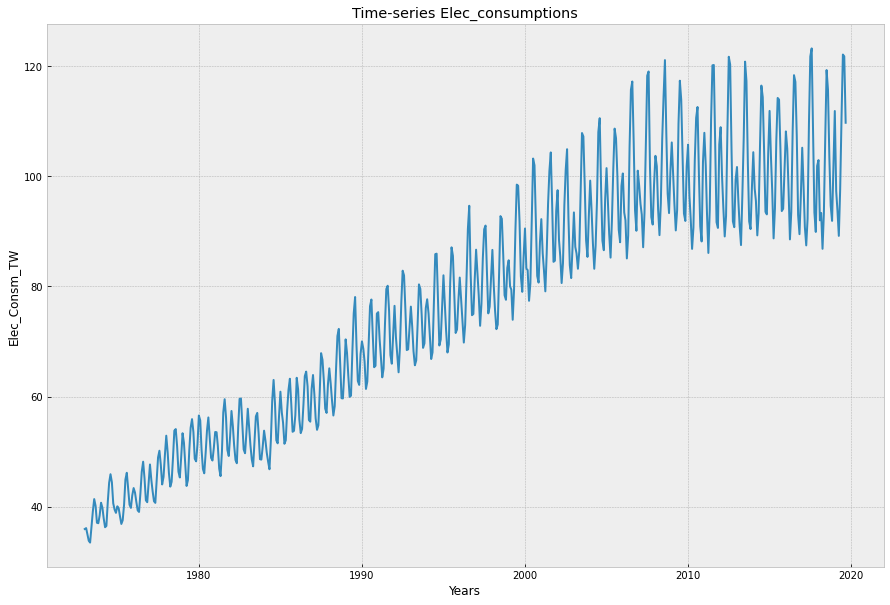

In [17]:
plt.figure(figsize=(15, 10))
plt.plot(df)
plt.xlabel('Years')
plt.ylabel('Elec_Consm_TW')
plt.title('Time-series Elec_consumptions')
plt.show()

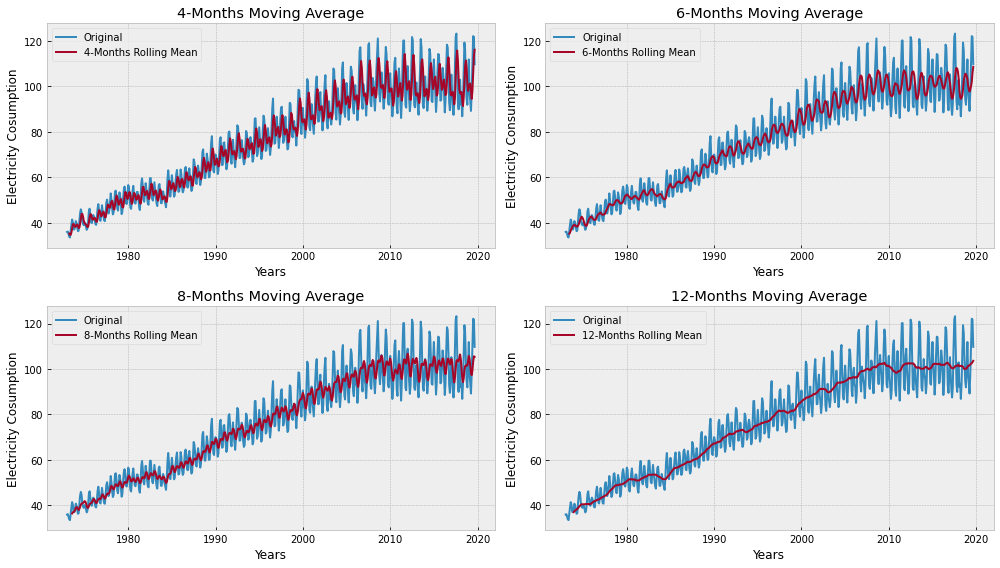

In [18]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(df.index, df, label='Original')
axes[0][0].plot(df.index, df.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Electricity Cosumption")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(df.index, df, label='Original')
axes[0][1].plot(df.index, df.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Electricity Consumption")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(df.index, df, label='Original')
axes[1][0].plot(df.index, df.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Electricity Cosumption")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(df.index, df, label='Original')
axes[1][1].plot(df.index, df.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Electricity Cosumption")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

As we could see in the above plots, 12-month moving average could produce a wrinkle free curve as desired. This on some level is expected since we are using month-wise data for our analysis and there is expected monthly-seasonal effect in our data.


In [19]:
monthly_consumption_data = pd.pivot_table(data, values = "Electricty_Consumption_in_TW", columns = "Year", index = "Month")
monthly_consumption_data = monthly_consumption_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_consumption_data

Year,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,,,,,,,,,,,,
Jan,35.9728,40.7455,40.0956,43.4099,47.6892,52.9153,53.3617,56.5838,53.5867,57.4002,...,105.7413,107.8967,108.9151,101.6890,104.3752,111.8708,108.1515,105.1879,102.9398,111.8520
Feb,36.1334,39.8340,39.6944,42.5826,44.8505,49.9488,51.6279,55.6802,53.5461,54.6248,...,96.4428,101.9572,100.0117,95.5366,97.7907,103.4990,104.9900,98.0069,92.0095,97.3261
Mar,35.0625,37.9408,38.3040,40.9244,42.8557,46.1749,47.8264,50.4428,51.0708,51.1896,...,92.2986,93.2285,94.3484,91.0434,95.5280,97.4134,97.5969,90.8029,93.3526,93.8406
Apr,33.8416,36.3004,36.8939,39.3533,41.0177,43.6652,43.7935,46.8693,46.9172,48.4958,...,86.8242,86.0874,89.0821,87.5189,89.2783,88.7323,88.5477,87.4594,86.8386,89.1873
May,33.5107,36.5293,37.5668,39.0766,40.7201,44.5402,44.8591,46.0886,45.5795,47.9140,...,90.6389,93.7706,92.7937,96.5166,93.2729,94.1360,93.5168,92.2811,93.2361,97.5860
Jun,36.4823,40.8899,40.3832,42.4851,45.0610,48.9480,50.3292,49.7595,50.0235,54.5292,...,103.0377,110.3572,108.5421,107.0627,105.7336,106.5504,108.1813,109.6104,107.1009,110.8580
Jul,39.1412,44.3563,44.9671,46.3693,48.9685,53.8292,54.3579,53.8273,57.1384,59.5975,...,110.6045,120.1457,121.6974,120.8149,116.4651,114.2235,118.3568,121.7478,119.2874,122.1014
Aug,41.4137,45.9240,46.1853,48.1945,50.1898,54.1182,55.9197,56.2272,59.5376,59.6727,...,112.5792,120.2087,120.2822,117.2932,114.3700,113.9230,117.1375,123.2163,115.7108,121.7765
Sep,40.1639,44.4555,43.3001,45.1688,47.5982,50.9980,53.5776,52.5737,56.1935,54.9644,...,100.4701,106.1109,104.6692,102.4185,104.3899,104.9454,107.3046,108.4514,103.4070,109.7190


In [20]:
monthly_consumption_data.isnull().sum()

Year
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    3
dtype: int64

In [21]:
df_2019=data.loc[((data.Month=='Oct') | (data.Month=='Nov') | (data.Month=='Dec')) & (data.Year>=2007) ]

In [22]:
df_2019.groupby('Month')['Electricty_Consumption_in_TW'].mean()

Month
Dec    101.021433
Nov     91.247483
Oct     93.102333
Name: Electricty_Consumption_in_TW, dtype: float64

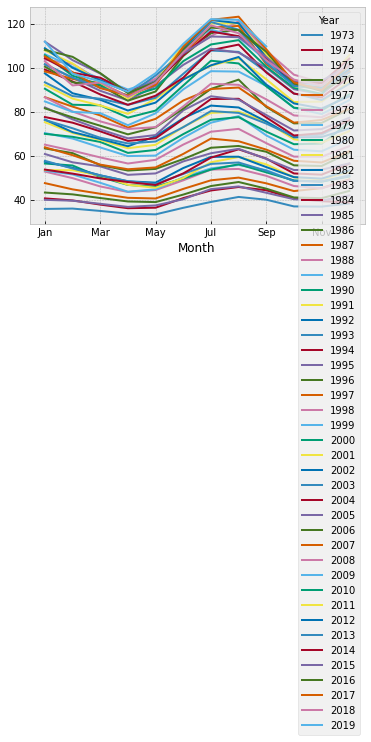

In [23]:
monthly_consumption_data.plot()

In [24]:
yearly_consumption_data = pd.pivot_table(data, values = "Electricty_Consumption_in_TW", columns = "Month", index = "Year")
yearly_consumption_data = yearly_consumption_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_consumption_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1973,35.9728,36.1334,35.0625,33.8416,33.5107,36.4823,39.1412,41.4137,40.1639,37.1133,37.0248,38.4341
1974,40.7455,39.8340,37.9408,36.3004,36.5293,40.8899,44.3563,45.9240,44.4555,40.6417,39.4901,38.9068
1975,40.0956,39.6944,38.3040,36.8939,37.5668,40.3832,44.9671,46.1853,43.3001,40.3836,39.8092,42.0597
1976,43.4099,42.5826,40.9244,39.3533,39.0766,42.4851,46.3693,48.1945,45.1688,41.1880,40.8431,44.1468
1977,47.6892,44.8505,42.8557,41.0177,40.7201,45.0610,48.9685,50.1898,47.5982,44.0684,45.4267,49.3447
1978,52.9153,49.9488,46.1749,43.6652,44.5402,48.9480,53.8292,54.1182,50.9980,46.3711,45.3267,49.0027
1979,53.3617,51.6279,47.8264,43.7935,44.8591,50.3292,54.3579,55.9197,53.5776,48.7261,48.2585,51.3008
1980,56.5838,55.6802,50.4428,46.8693,46.0886,49.7595,53.8273,56.2272,52.5737,48.8947,48.4081,50.6659
1981,53.5867,53.5461,51.0708,46.9172,45.5795,50.0235,57.1384,59.5376,56.1935,50.3249,49.2234,52.8176


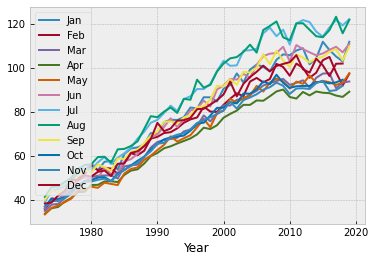

In [25]:
yearly_consumption_data.plot().legend(loc='best')

The Electricity Consumption  have been increasing without fail every year till 2010 and then there are slight increase every year. .

July and August are the peak months for Electricity Consumption and April is the lowest month.

In [26]:
decomposition = sm.tsa.seasonal_decompose(df, model='multiplicative', extrapolate_trend=12)

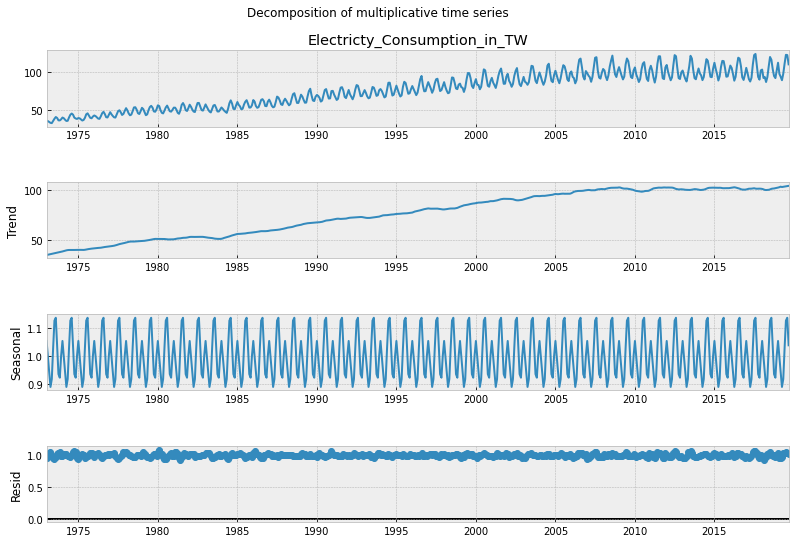

In [27]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

We can see a seasonal cycle of 12 months where the mean value of each month starts with a decreasing trend in the beginning of the year and rise up towards the end of the year. We can see a seasonal effect with a cycle of 12 months.

In [28]:
decomp_output = pd.DataFrame(pd.concat([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid], axis=1))

In [29]:
decomp_output.columns = ['observed', 'Trend', 'Seasonal', 'Irregular']

In [30]:
decomp_output['TSI'] = decomp_output.Trend*decomp_output.Seasonal*decomp_output.Irregular

In [31]:
decomp_output

,observed,Trend,Seasonal,Irregular,TSI
1973-01-01,35.9728,35.464110,1.054225,0.962171,35.9728
1973-02-01,36.1334,35.760505,0.996145,1.014338,36.1334
1973-03-01,35.0625,36.056899,0.945680,1.028278,35.0625
1973-04-01,33.8416,36.353293,0.890985,1.044808,33.8416
1973-05-01,33.5107,36.649687,0.919033,0.994907,33.5107
...,...,...,...,...,...
2019-05-01,97.5860,103.195818,0.919033,1.028950,97.5860
2019-06-01,110.8580,103.423514,1.030541,1.040117,110.8580
2019-07-01,122.1014,103.651210,1.126583,1.045642,122.1014
2019-08-01,121.7765,103.878907,1.136594,1.031408,121.7765


# Timeseries Forecasting using FBProphet

In [32]:
from fbprophet import Prophet

In [33]:
data['ds'] = data.index

In [34]:
data.head()

,Electricty_Consumption_in_TW,Month,Year,ds
1973-01-01,35.9728,Jan,1973,1973-01-01
1973-02-01,36.1334,Feb,1973,1973-02-01
1973-03-01,35.0625,Mar,1973,1973-03-01
1973-04-01,33.8416,Apr,1973,1973-04-01
1973-05-01,33.5107,May,1973,1973-05-01


In [35]:
data.drop(columns=['Month','Year'], inplace=True)

In [36]:
data.head()

,Electricty_Consumption_in_TW,ds
1973-01-01,35.9728,1973-01-01
1973-02-01,36.1334,1973-02-01
1973-03-01,35.0625,1973-03-01
1973-04-01,33.8416,1973-04-01
1973-05-01,33.5107,1973-05-01


In [37]:
data = data[['ds', 'Electricty_Consumption_in_TW']].rename(columns={'ds': 'ds', 'Electricty_Consumption_in_TW': 'y'})

In [38]:
elec_model = Prophet(seasonality_mode='multiplicative',interval_width=0.95)
elec_model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
elec_forecast = elec_model.make_future_dataframe(periods=24, freq='MS')
elec_forecast = elec_model.predict(elec_forecast)

In [40]:
elec_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1973-01-01,36.715580,33.946638,42.667187,36.715580,36.715580,0.047552,0.047552,0.047552,0.047552,0.047552,0.047552,0.0,0.0,0.0,38.461461
1,1973-02-01,36.886050,31.705679,40.488890,36.886050,36.886050,-0.019424,-0.019424,-0.019424,-0.019424,-0.019424,-0.019424,0.0,0.0,0.0,36.169561
2,1973-03-01,37.040023,30.302834,39.516190,37.040023,37.040023,-0.061438,-0.061438,-0.061438,-0.061438,-0.061438,-0.061438,0.0,0.0,0.0,34.764363
3,1973-04-01,37.210494,28.228169,37.247144,37.210494,37.210494,-0.116693,-0.116693,-0.116693,-0.116693,-0.116693,-0.116693,0.0,0.0,0.0,32.868306
4,1973-05-01,37.375465,30.194256,38.885132,37.375465,37.375465,-0.077865,-0.077865,-0.077865,-0.077865,-0.077865,-0.077865,0.0,0.0,0.0,34.465215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,2021-05-01,102.626167,90.265567,98.919880,102.192121,103.147336,-0.077865,-0.077865,-0.077865,-0.077865,-0.077865,-0.077865,0.0,0.0,0.0,94.635154
581,2021-06-01,102.636859,102.241641,111.330993,102.168673,103.195245,0.040659,0.040659,0.040659,0.040659,0.040659,0.040659,0.0,0.0,0.0,106.810005
582,2021-07-01,102.647207,112.481390,121.346340,102.153159,103.234098,0.139977,0.139977,0.139977,0.139977,0.139977,0.139977,0.0,0.0,0.0,117.015474
583,2021-08-01,102.657899,113.476257,122.063005,102.141200,103.286015,0.147229,0.147229,0.147229,0.147229,0.147229,0.147229,0.0,0.0,0.0,117.772078


In [97]:
elec_forecast[elec_forecast.ds=='2019-09-01']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
560,2019-09-01,102.416455,101.852381,110.632075,102.416455,102.416455,0.036184,0.036184,0.036184,0.036184,0.036184,0.036184,0.0,0.0,0.0,106.122335


In [98]:
elec_forecast.yhat[:-25]

0       38.461461
1       36.169561
2       34.764363
3       32.868306
4       34.465215
          ...    
555     89.789225
556     94.377376
557    107.250988
558    117.103619
559    116.694731
Name: yhat, Length: 560, dtype: float64

In [117]:
df1=df
df2=df1.reset_index()
y=df2['Electricty_Consumption_in_TW']
y

0       35.9728
1       36.1334
2       35.0625
3       33.8416
4       33.5107
         ...   
556     97.5860
557    110.8580
558    122.1014
559    121.7765
560    109.7190
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

In [119]:

yhat=elec_forecast.yhat[:-24]
yhat

0       38.461461
1       36.169561
2       34.764363
3       32.868306
4       34.465215
          ...    
556     94.377376
557    107.250988
558    117.103619
559    116.694731
560    106.122335
Name: yhat, Length: 561, dtype: float64

In [120]:
#Mean absolute percentage error
MAPE = np.mean(np.abs(y - yhat)/y)

In [121]:
print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE, 4)))


The Mean Absolute percentage error of our forecast for last two years is 0.0239


In [122]:
# Compute the mean square error
mse = ((y - yhat) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 4.8852
The ROOT Mean Squared Error of our forecasts is 2.2102488547672636


<Figure size 1296x432 with 0 Axes>

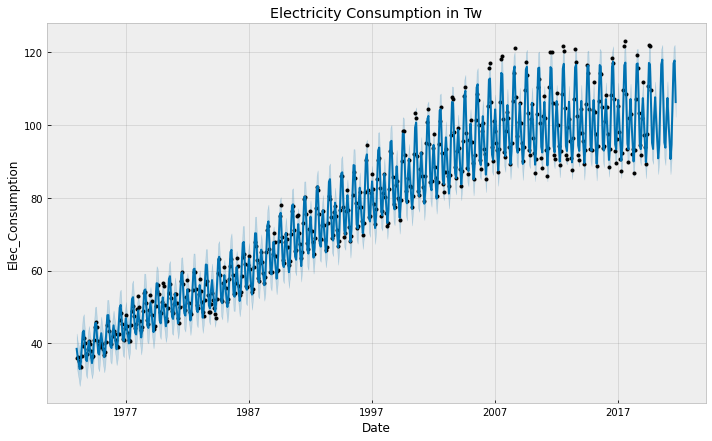

In [41]:
plt.figure(figsize=(18, 6))
elec_model.plot(elec_forecast, xlabel = 'Date', ylabel = 'Elec_Consumption')
plt.title('Electricity Consumption in Tw');

#### Trends and Patterns
Now, we can use the Prophet Models to inspect different trends of these two categories in the data.

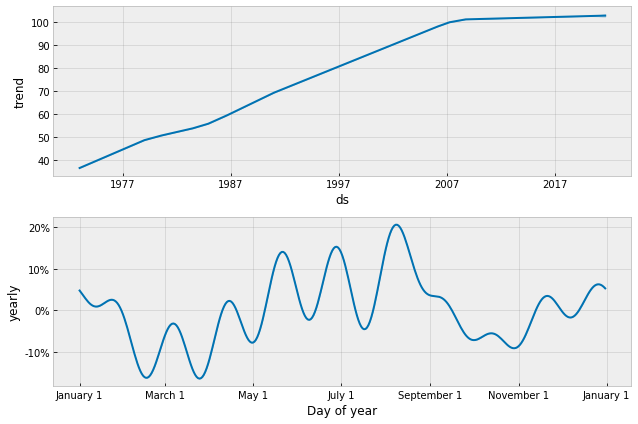

In [42]:
elec_model.plot_components(elec_forecast);

Good to see that the tractor sales have been linearly increasing over time 05
The worst months for Electricity consumption are February, March and OCtober. The best months for Electricity consumption are June and August.

### ETS Models (Exponential Smoothening Models)

In [43]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# our guessed parameters
alpha = 0.45
beta = 0.05
gamma = 0.5

# initialise model
ets_model = ExponentialSmoothing(df, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
#ets_fit = ets_model.fit(optimized=True)

C:\Users\Mesho\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Mesho\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Mesho\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [44]:
# forecast p months ahead
p_ahead = 24
fcast = ets_fit.forecast(p_ahead)

In [45]:
fcast

2019-10-01     97.287364
2019-11-01     93.841502
2019-12-01    104.287110
2020-01-01    111.763649
2020-02-01     99.503516
2020-03-01     98.302001
2020-04-01     93.515477
2020-05-01    100.984950
2020-06-01    114.773929
2020-07-01    126.528526
2020-08-01    125.048451
2020-09-01    110.829685
2020-10-01     99.232246
2020-11-01     95.717498
2020-12-01    106.371925
2021-01-01    113.997928
2021-02-01    101.492702
2021-03-01    100.267168
2021-04-01     95.384955
2021-05-01    103.003751
2021-06-01    117.068387
2021-07-01    129.057972
2021-08-01    127.548309
2021-09-01    113.045294
Freq: MS, dtype: float64

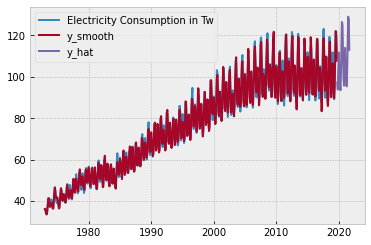

In [46]:
# plot the y, y_smoothed and y_hat ts'
plt.plot(df, label='Electricity Consumption in Tw')
plt.plot(ets_fit.fittedvalues, label='y_smooth')
plt.plot(fcast, label='y_hat')

plt.legend()
plt.show()

-----------------------------------------------------------------------------------

## Stationary Data for ARIMA models
### Dickey-Fuller Test 
- Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [47]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.740593
p-value                          0.410328
#lags Used                      15.000000
Number of Observations Used    545.000000
Critical Value (1%)             -3.442406
Critical Value (5%)             -2.866858
Critical Value (10%)            -2.569602
dtype: float64


In [50]:
df_log = np.log10(df)

In [51]:
df_log_diff1 = df_log.diff(1)
df_log_diff1.dropna(inplace=True)

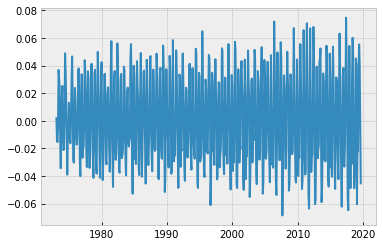

In [52]:
plt.plot(df_log_diff1)

In [53]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df_log_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.884810e+00
p-value                        1.403418e-09
#lags Used                     1.400000e+01
Number of Observations Used    5.450000e+02
Critical Value (1%)           -3.442406e+00
Critical Value (5%)           -2.866858e+00
Critical Value (10%)          -2.569602e+00
dtype: float64


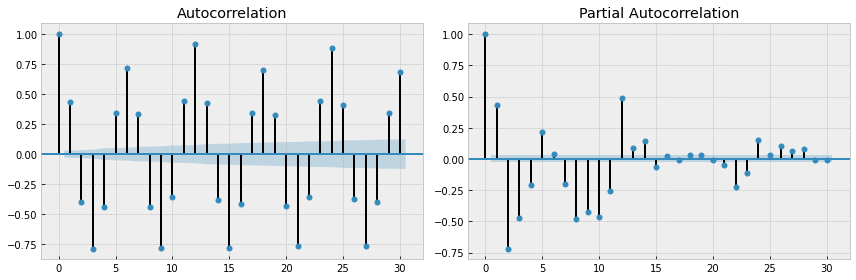

In [54]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(df_log_diff1, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(df_log_diff1, lags=30, ax=axes[1], alpha=0.5,method='ols')
plt.tight_layout()

This makes sense since we are analyzing monthly data that tends to have seasonality of 12 months because of patterns in Electricity Consumptions.

In [56]:
model = sm.tsa.statespace.SARIMAX(df_log_diff1, order = (1,0,2), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

In [57]:
results = model.fit()

In [58]:
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:        Electricty_Consumption_in_TW   No. Observations:                  560
Model:             SARIMAX(1, 0, 2)x(1, 0, [], 12)   Log Likelihood                1698.321
Date:                             Thu, 02 Sep 2021   AIC                          -3386.642
Time:                                     16:20:17   BIC                          -3365.120
Sample:                                 02-01-1973   HQIC                         -3378.230
                                      - 09-01-2019                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6182      0.052     11.868      0.000       0.516       0.720
ma.L1         -0.8609      

### Iterate the process to find the best values for p, d, q and P, D, Q

In [68]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 2)
d = range(0,2)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [69]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [70]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,2)
P = Q = range(0, 2) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [71]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [73]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(df_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{},{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1),(1, 0, 1, 12)12 model - AIC:-3577.48519714836


#### Predict sales on in-sample date using the best fit ARIMA model

In [74]:
best_model = sm.tsa.statespace.SARIMAX(df_log,
                                      order=(1, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

In [75]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  561
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                1793.743
Date:                            Thu, 02 Sep 2021   AIC                          -3577.485
Time:                                    16:28:43   BIC                          -3555.972
Sample:                                01-01-1973   HQIC                         -3569.076
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6120      0.054     11.365      0.000       0.506       0.718
ma.L1         -0.8908      0.034   

In [76]:
df

1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Freq: MS, Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

In [77]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2019-01-01'), full_results=True)

In [78]:
np.power(10, pred_dynamic.predicted_mean)

2019-01-01    106.892628
2019-02-01    102.338704
2019-03-01     93.311604
2019-04-01     87.712333
2019-05-01     94.532112
2019-06-01    111.536997
2019-07-01    121.816835
2019-08-01    120.731744
2019-09-01    108.152848
Freq: MS, Name: predicted_mean, dtype: float64

In [80]:
df['2019-01-01':]

2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Freq: MS, Name: Electricty_Consumption_in_TW, dtype: float64

In [81]:
forecast = np.power(10,pred_dynamic.predicted_mean)

In [82]:
actual = df['2014-01-01':]

In [83]:
#Mean absolute percentage error
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)

In [84]:
print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE_last1year, 4)))


The Mean Absolute percentage error of our forecast for last two years is 0.0201


In [85]:
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 7.2877
The ROOT Mean Squared Error of our forecasts is 2.699574040473793


### Forecast for next 24 Months

In [86]:
np.power(10, best_results.forecast(steps=24))

2019-10-01     96.411053
2019-11-01     93.792113
2019-12-01    103.840991
2020-01-01    109.973163
2020-02-01    100.762493
2020-03-01     96.241294
2020-04-01     90.058023
2020-05-01     96.341476
2020-06-01    111.099045
2020-07-01    122.726449
2020-08-01    121.908466
2020-09-01    108.885209
2020-10-01     96.130547
2020-11-01     93.824565
2020-12-01    104.173946
2021-01-01    110.514806
2021-02-01    101.274847
2021-03-01     96.745408
2021-04-01     90.513049
2021-05-01     96.893234
2021-06-01    111.863312
2021-07-01    123.668352
2021-08-01    122.843254
2021-09-01    109.633078
Freq: MS, Name: predicted_mean, dtype: float64

In [87]:
n_steps = 24
pred_uc_99 = best_results.get_forecast(steps=24, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=24, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [89]:
n_steps = 24
idx = pd.date_range(df.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [90]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
2019-09-01,96.411053,92.603124,100.375566
2019-10-01,93.792113,89.245966,98.569839
2019-11-01,103.840991,98.341664,109.647845
2019-12-01,109.973163,103.848226,116.459348
2020-01-01,100.762493,94.957238,106.922654


In [91]:
fc_99.head()

,lower_ci_99,upper_ci_99
2019-09-01,92.603124,100.375566
2019-10-01,89.245966,98.569839
2019-11-01,98.341664,109.647845
2019-12-01,103.848226,116.459348
2020-01-01,94.957238,106.922654


--------------------------------------------------------------------------------------------------

### Diagnostics

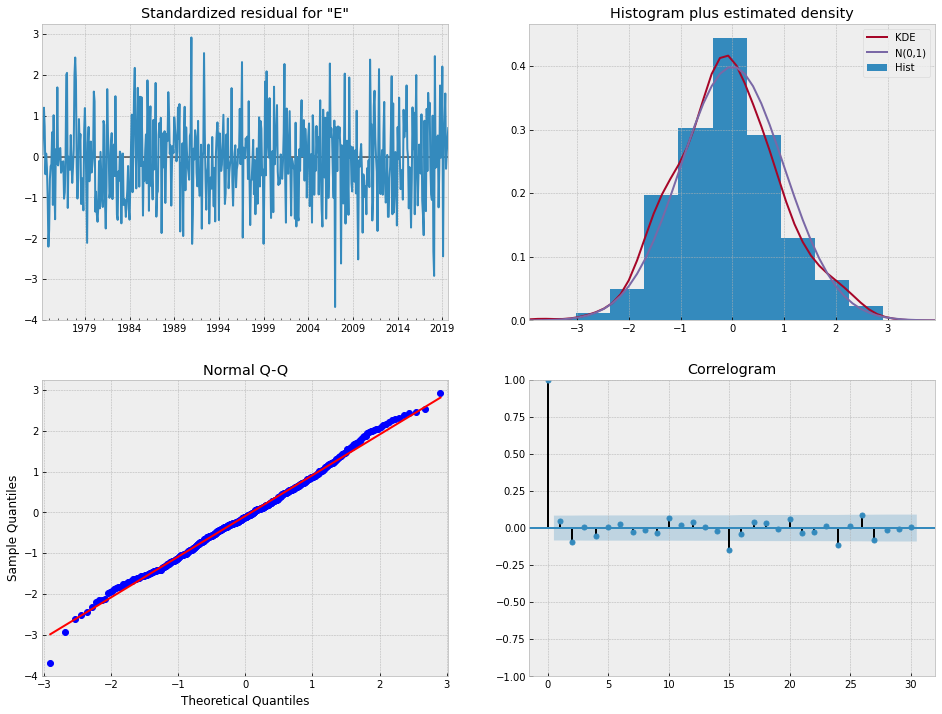

In [92]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

## Conclusion

According to the metrics Mean Absolute Percentage Error values between different Time-series techiniques specially : FBprophet & ARIMA 
    
    we choose ARIMA  as ARIMA-MAPE: 2%  &  FBprophet-MAPE: 2.4%
            
Therefor we choose ARIMA and it's MSE= 7.2 & RMSE= 2.69
